In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.width', 55)
import seaborn as sns
import matplotlib.pyplot as plt
df_raw = pd.read_csv(r"/workspaces/ts-hybrid-forecasting-model/univariate/evaluations/ridge_lasso_enr_dt/mape.csv")
data = pd.read_csv(r"/workspaces/ts-hybrid-forecasting-model/univariate/evaluations/ridge_lasso_enr_dt/mape.csv", index_col=0)
df_dataset_removed = pd.read_csv("/workspaces/ts-hybrid-forecasting-model/univariate/evaluations/ridge_lasso_enr_dt/mape.csv").drop(columns="fname", axis = 1)

The csv file consist of the performance of machine learning models against sampled univariate time series data from M4 competition (i.e., from each domain, we sampled 50 datasets). Mean absolute percentage error (MAPE) was used as an evaluation metrics (performance metrics). 

Basic summary

In [2]:
df_dataset_removed.describe()

,ridge,lasso,enr,dt,ridge_lasso_enr_dt
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.053250,0.057362,0.057878,0.064339,0.039169
std,0.094241,0.090200,0.115230,0.113026,0.072742
min,0.000423,0.000218,0.000218,0.000176,0.000148
25%,0.017584,0.019942,0.017446,0.018786,0.014190
50%,0.026334,0.032358,0.029564,0.029249,0.020663
75%,0.044388,0.055329,0.050818,0.057685,0.034147
max,0.903586,0.910467,1.271854,1.022029,0.621421


Side-by-side box plot

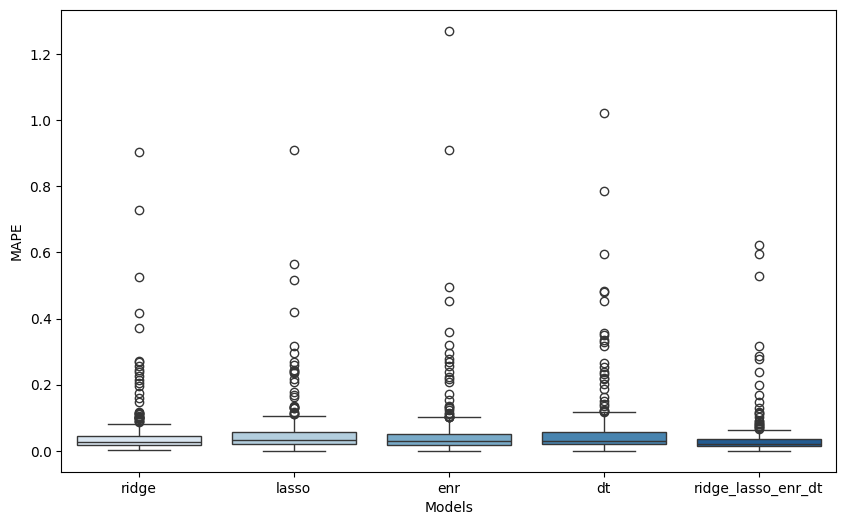

In [3]:
plt.figure(figsize=(10, 6))
plt.xlabel("Models")  # Replace with your x-axis label
plt.ylabel("MAPE")  # Replace with your y-axis label
sns.boxplot(data=df_dataset_removed, palette="Blues")
# Show the p
# plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

In [4]:
from scipy.stats import ttest_ind, ttest_rel

# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and ARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["ridge"].values

t_stat, p_value = ttest_rel(group1, group2, alternative="less")
print("one-tailed test - ridge_lasso_enr_dt and ridge: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")

# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["lasso"].values

t_stat, p_value = ttest_rel(group1, group2, alternative="less")
print("one-tailed test - ridge_lasso_enr_dt and lasso: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")


# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["enr"].values

t_stat, p_value = ttest_rel(group1, group2, alternative="less")
print("one-tailed test - ridge_lasso_enr_dt and enr: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")


# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["dt"].values

t_stat, p_value = ttest_rel(group1, group2, alternative="less")
print("one-tailed test - ridge_lasso_enr_dt and dt: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")

one-tailed test - ridge_lasso_enr_dt and ridge: 
T-statistic: -4.11848873225064, P-value: 0.0000
one-tailed test - ridge_lasso_enr_dt and lasso: 
T-statistic: -4.057646331209734, P-value: 0.0000
one-tailed test - ridge_lasso_enr_dt and enr: 
T-statistic: -3.017165697275622, P-value: 0.0014
one-tailed test - ridge_lasso_enr_dt and dt: 
T-statistic: -4.761819833406348, P-value: 0.0000


In [5]:
from scipy.stats import ttest_ind, ttest_rel

# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and ARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["ridge"].values

t_stat, p_value = ttest_ind(group1, group2, alternative="less", equal_var=False)
print("one-tailed test - ridge_lasso_enr_dt and ridge: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")

# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["lasso"].values

t_stat, p_value = ttest_ind(group1, group2, alternative="less", equal_var=False)
print("one-tailed test - ridge_lasso_enr_dt and lasso: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")


# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["enr"].values

t_stat, p_value = ttest_ind(group1, group2, alternative="less", equal_var=False)
print("one-tailed test - ridge_lasso_enr_dt and enr: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")


# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["dt"].values

t_stat, p_value = ttest_ind(group1, group2, alternative="less", equal_var=False)
print("one-tailed test - ridge_lasso_enr_dt and dt: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")

one-tailed test - ridge_lasso_enr_dt and ridge: 
T-statistic: -1.8701118316793732, P-value: 0.0310
one-tailed test - ridge_lasso_enr_dt and lasso: 
T-statistic: -2.4823221167733913, P-value: 0.0067
one-tailed test - ridge_lasso_enr_dt and enr: 
T-statistic: -2.1707434251330335, P-value: 0.0153
one-tailed test - ridge_lasso_enr_dt and dt: 
T-statistic: -2.960814502035064, P-value: 0.0016


Side-by-side box plot where outliers are removed using IQR method. 

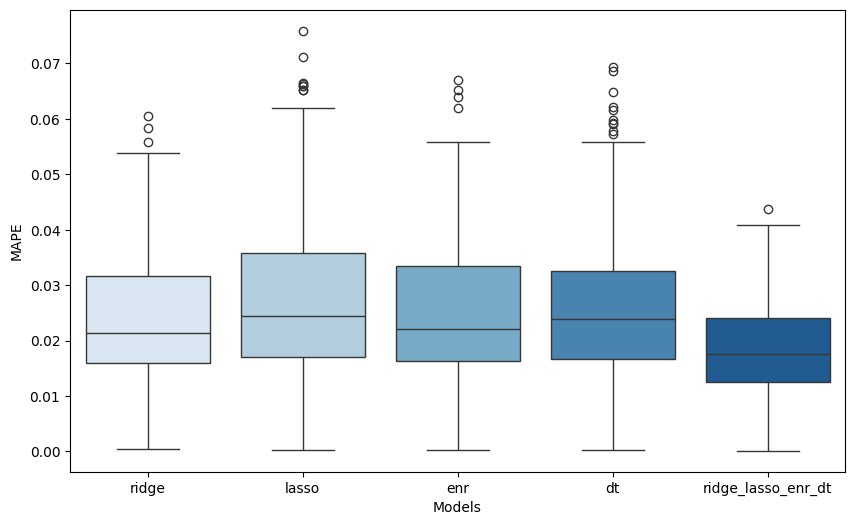

In [6]:
# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df):
    df = df.copy(deep=True)
    for col in df.select_dtypes(
        include="number"
    ).columns:  # Loop through each numerical column
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where the value in this column is an outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df


# Assuming df is your original DataFrame
df_clean = remove_outliers_iqr(df_dataset_removed)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, palette="Blues")
plt.xlabel("Models")  # Replace with your x-axis label
plt.ylabel("MAPE")  # Replace with your y-axis label

# Show the plot
# plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

average rank of model's performance

In [7]:
# Rank each model's performance (lower MAE = better performance, so rank ascending)
ranked_data = data.rank(axis=1, method='average', ascending=True)
# Calculate the average rank for each model across all datasets
average_ranks = ranked_data.mean(axis=0).sort_values()
# print("Average Ranks for Each Model:\n", average_ranks)
average_ranks

ridge_lasso_enr_dt    1.536
ridge                 3.108
enr                   3.348
dt                    3.364
lasso                 3.644
dtype: float64

Bar graph of average rank of model's performance

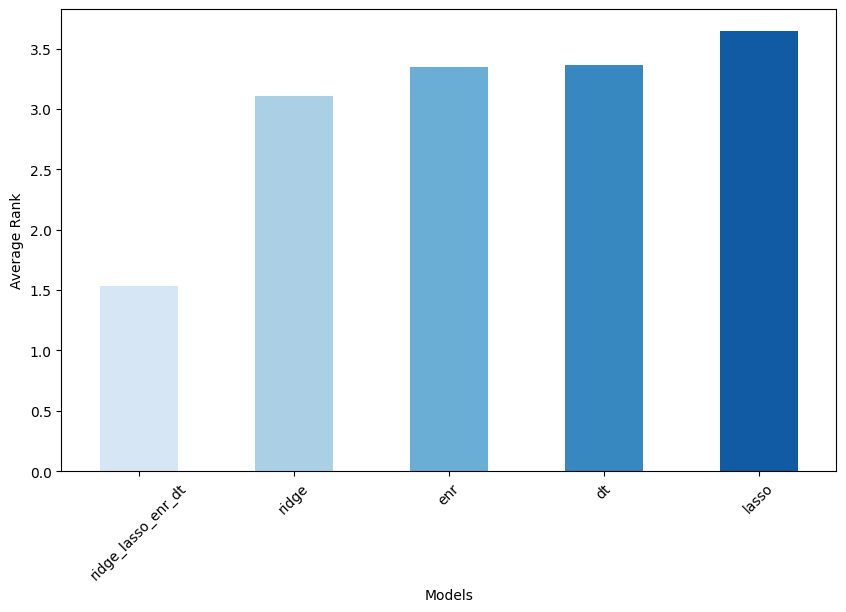

In [8]:
blue_palette = sns.color_palette("Blues", n_colors=len(average_ranks))

# Plot the bar chart with the blue color palette
average_ranks.plot(kind='bar', figsize=(10, 6), color=blue_palette)

# Add labels and title if needed
plt.ylabel('Average Rank')
plt.xlabel('Models')
plt.xticks(rotation=45)
# plt.title('Average Rank of Models Across Datasets')
plt.show()

Heat map of model ranking per dataset

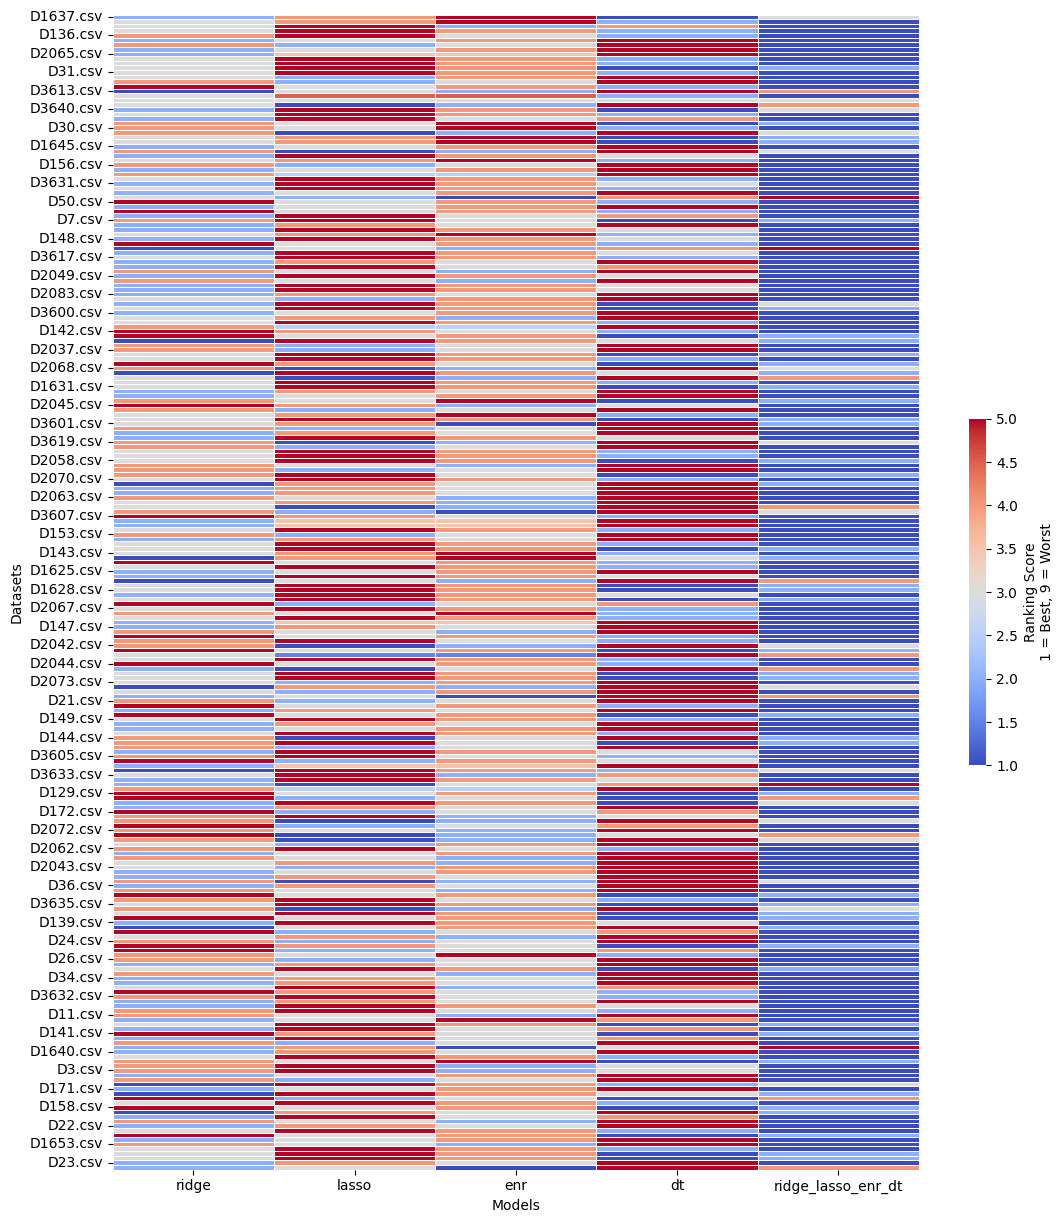

In [9]:
# # Plot heatmap of ranked models
# plt.figure(figsize=(10, 15))
# sns.heatmap(ranked_data, annot=False, cmap='coolwarm', linewidths=0.5)
# plt.title('Model Rankings per Dataset')
# plt.xlabel('Models')
# plt.ylabel('Datasets')
# plt.show()

# Plot heatmap of ranked models with a smaller color bar
plt.figure(figsize=(13, 15))
sns.heatmap(
    ranked_data,
    annot=False,
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Ranking Score\n1 = Best, 9 = Worst', 'shrink': 0.3}  # Adjust shrink value
)

# Add labels for the plot
# plt.title('Model Rankings per Dataset')
plt.xlabel('Models')
plt.ylabel('Datasets')

plt.show()
